# Objective
- 波高とイン逃げ率の関係を知る。
- 下記のノートを書く際に作成
https://note.com/girikun/n/nf59fe29d1015

In [45]:
# 必要なモジュールのインポート

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import termcolor
from datetime import datetime
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../conf/'))
sys.path.append(os.path.join(current_dir, '../crawl/'))
sys.path.append(os.path.join(current_dir, '../data_preparing/'))
sys.path.append(os.path.join(current_dir, 'analyzer_conf/'))

# my module
import loader
import boatrace_crawler_conf
import analyzer_conf

In [55]:
race_result_df = loader.load_race_results()

In [56]:
print("分析に用いたデータ日時: {0}〜{1}".format(min(race_result_df.date), max(race_result_df.date)))
print("最大波高：{0}, 最小波高: {1}".format(max(race_result_df.waveHight), min(race_result_df.waveHight)))

分析に用いたデータ日時: 2019-01-01 00:00:00〜2019-12-08 00:00:00
最大波高：9, 最小波高: 0


In [57]:
wave_hight_list = []
win_ratio_each_frame_list = []

# 波高ごとのfor loop
for waveHight, group in race_result_df.groupby("waveHight"):

    # 各波高のレース回数
    race_times = len(group)

    # １号艇から6号艇までの勝利回数
    win_times_each_frame = [group.rank_1.value_counts()[j] for j in range(1, 7)]
    # 1号艇から6号艇までの勝率
    win_ratio_each_frame = [win_times / race_times for win_times in win_times_each_frame]
    
    wave_hight_list.append(waveHight)
    win_ratio_each_frame_list.append(win_ratio_each_frame)
    
    print("波高{0}のレースは{1}回あり、そのうちの{2}回で1号艇が1着. イン逃げ率は{3}".format(
        waveHight, race_times, win_times_each_frame[0], win_ratio_each_frame[0]))

波高0のレースは4605回あり、そのうちの2471回で1号艇が1着. イン逃げ率は0.5365906623235613
波高1のレースは12605回あり、そのうちの7436回で1号艇が1着. イン逃げ率は0.5899246330821103
波高2のレースは10798回あり、そのうちの5867回で1号艇が1着. イン逃げ率は0.5433413595110206
波高3のレースは10464回あり、そのうちの5595回で1号艇が1着. イン逃げ率は0.5346903669724771
波高4のレースは3568回あり、そのうちの1852回で1号艇が1着. イン逃げ率は0.5190582959641256
波高5のレースは4318回あり、そのうちの2148回で1号艇が1着. イン逃げ率は0.49745252431681336
波高6のレースは990回あり、そのうちの484回で1号艇が1着. イン逃げ率は0.4888888888888889
波高7のレースは586回あり、そのうちの301回で1号艇が1着. イン逃げ率は0.5136518771331058
波高8のレースは287回あり、そのうちの139回で1号艇が1着. イン逃げ率は0.4843205574912892
波高9のレースは65回あり、そのうちの33回で1号艇が1着. イン逃げ率は0.5076923076923077


In [62]:
pd.DataFrame(win_ratio_each_frame_list)

,0,1,2,3,4,5
0,0.536591,0.178502,0.088599,0.073616,0.063626,0.048643
1,0.589925,0.162475,0.081952,0.060690,0.053550,0.041412
2,0.543341,0.175032,0.084831,0.071217,0.058807,0.055381
3,0.534690,0.169438,0.092412,0.071674,0.063169,0.057531
4,0.519058,0.186379,0.092209,0.076794,0.060818,0.053251
5,0.497453,0.184345,0.097730,0.080593,0.069940,0.053960
6,0.488889,0.200000,0.081818,0.086869,0.068687,0.060606
7,0.513652,0.192833,0.085324,0.075085,0.068259,0.052901
8,0.484321,0.191638,0.108014,0.083624,0.045296,0.066202
9,0.507692,0.184615,0.184615,0.046154,0.061538,0.015385


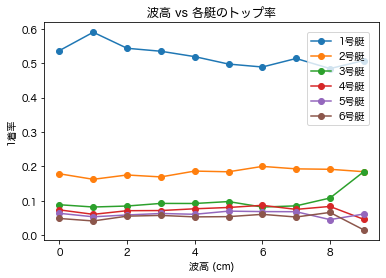

In [65]:
# [[1号艇, 2号艇, 3号艇...] of 波高0, [1号艇, 2号艇, 3号艇...] of 波高1, ...]となっているリストを
# [[波高0, 波高1, 波高3...] of 1号艇, [波高0, 波高1, 波高3...] of 2号艇, ...]へと変換してプロット

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for j in range(6):
    win_ratio_list = [win_ratio[j] for win_ratio in win_ratio_each_frame_list]
    ax.plot(wave_hight_list, win_ratio_list, label="{0}号艇".format(j+1), marker="o")

plt.title("波高 vs 各艇のトップ率")
ax.set_xlabel("波高 (cm)")
ax.set_ylabel("1着率")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1)
plt.savefig('figure.png')

In [66]:
race_result_df.query("waveHight > 7 & rank_3==1")["date", ]

,date,venue,raceNumber,weather,windDir,windPow,waveHight,ruler,win,winOdds,...,raceTime_5,rank_6,racerId_6,racerName_6,motor_6,boat_6,exhibitionTime_6,cource_6,startTime_6,raceTime_6
3460,2019-02-10,桐 生,3,晴,西,8,8,まくり,3,370,...,113.05,6,3141,山 来 和 人,21,70,6.99,6.0,0.35,116.03
4625,2019-06-15,唐 津,10,曇,北,8,8,まくり,3,270,...,116.01,2,3297,藤 丸 光 一,25,81,6.92,3.0,0.17,112.00
8261,2019-11-20,鳴 門,10,晴,北西,8,8,まくり,3,1160,...,NaN,4,4928,栗 城 匠,39,37,6.90,6.0,0.15,111.09
10269,2019-02-17,桐 生,7,晴,北西,8,9,まくり,3,680,...,77.06,3,4193,郷 原 章 平,67,62,6.95,6.0,0.18,75.08
10610,2019-05-02,桐 生,4,晴,北西,8,9,まくり,3,530,...,115.04,5,3448,高 山 秀 雄,59,31,7.22,5.0,0.25,117.07
13577,2019-05-17,若 松,3,晴,東,9,9,差し,3,320,...,119.07,5,4580,長谷川 雅 和,39,68,7.16,6.0,0.17,NaN
15895,2019-03-13,尼 崎,4,晴,南西,1,9,差し,3,370,...,115.06,5,4327,加 藤 翔,13,60,6.67,6.0,0.58,118.04
17284,2019-09-19,唐 津,5,晴,北東,8,8,まくり,3,110,...,113.06,6,5040,木 村 颯,60,82,7.00,5.0,0.13,118.06
17286,2019-09-19,唐 津,7,晴,北,8,8,まくり,3,120,...,111.05,6,5093,浦 野 海,27,67,6.98,6.0,0.24,117.09
17289,2019-09-19,唐 津,10,晴,北東,9,9,まくり,3,460,...,117.06,3,3352,小 川 晃 司,63,40,6.97,6.0,0.12,114.08
